# 1. Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('query_table.csv')

# 2. Primary data review

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       127 non-null    int64  
 1   flight_no       127 non-null    object 
 2   flying_time     127 non-null    float64
 3   departure_city  127 non-null    object 
 4   arrival_city    127 non-null    object 
 5   model           127 non-null    object 
 6   spent           127 non-null    float64
 7   income          127 non-null    float64
 8   profit          127 non-null    float64
 9   total_seats     127 non-null    int64  
 10  boarding_seats  127 non-null    float64
 11  seats_percent   127 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 12.0+ KB


In [3]:
df.describe()

,flight_id,flying_time,spent,income,profit,total_seats,boarding_seats,seats_percent
count,127.000000,127.000000,127.000000,1.270000e+02,1.270000e+02,127.000000,127.000000,127.000000
mean,136533.574803,91.377953,145096.909805,1.093131e+06,9.480346e+05,114.669291,94.448819,0.836174
std,252.498327,64.377474,124061.465815,5.525335e+05,5.781810e+05,16.523699,29.589710,0.244847
min,136119.000000,49.000000,52167.110917,0.000000e+00,-5.602012e+05,97.000000,0.000000,0.000000
25%,136313.000000,50.000000,54649.312083,7.146000e+05,6.595442e+05,97.000000,89.500000,0.823077
50%,136540.000000,99.000000,169682.370000,7.653000e+05,7.110036e+05,130.000000,97.000000,0.896907
75%,136757.500000,100.000000,177756.150000,1.610300e+06,1.435683e+06,130.000000,110.000000,0.981998
max,136956.000000,312.000000,560201.200000,1.886000e+06,1.706448e+06,130.000000,130.000000,1.000000


<AxesSubplot:>

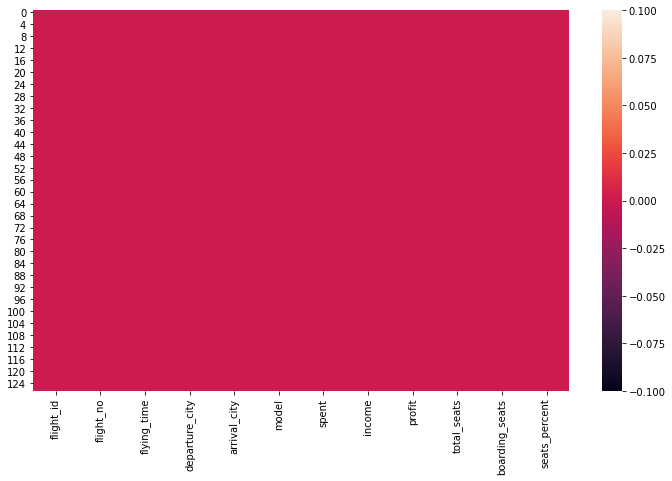

In [4]:
plt.subplots(figsize=(12, 7))
sns.heatmap(df.isnull())

In [5]:
print("Дубликатов найдено:", df.duplicated(keep=False).sum())
print("Пропусков найдено:", df.isnull().sum().sum())

Дубликатов найдено: 0
Пропусков найдено: 0


In [6]:
df.columns

Index(['flight_id', 'flight_no', 'flying_time', 'departure_city',
       'arrival_city', 'model', 'spent', 'income', 'profit', 'total_seats',
       'boarding_seats', 'seats_percent'],
      dtype='object')

In [7]:
df.head(1)

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
0,136900,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54296.38075,765300.0,711003.61925,97,97.0,1.0


In [8]:
print(f'Всего затраты составили {round(sum(df.spent),2)} рублей')
print(f'Валовая прибыль - {round(sum(df.income))} рублей')
print(f'Чистая прибыль за период - {round(sum(df.profit),2)} рублей')

Всего затраты составили 18427307.55 рублей
Валовая прибыль - 138827700 рублей
Чистая прибыль за период - 120400392.45 рублей


In [9]:
print(f'Средние затраты на рейс -  {round(df["spent"].mean(),2)} рублей')
print(f'Средняя прибыль с рейса - {round(df["income"].mean(),2)} рублей')
print(f'Чистая прибыль с рейса  - {round(df["profit"].mean(),2)} рублей')

Средние затраты на рейс -  145096.91 рублей
Средняя прибыль с рейса - 1093131.5 рублей
Чистая прибыль с рейса  - 948034.59 рублей


## 2.1. Functions

In [10]:
def primary_analysis(x):
    a = df[x].value_counts()
    b = df.loc[:, [x]].info()
    c = df[x].unique()
    d = df[x].describe()
    e = sns.countplot(x=x,data=df)
    return a, b, c, d

In [11]:
def primary_analysis_num(x):
    a = df[x].value_counts()
    b = df.loc[:, [x]].info()
    c = df[x].describe()
    d = sns.boxplot(x=x,data=df)
    return a, b, c, d

# 3. Primary analysis of data in columns

## 3.1 flying_time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flying_time  127 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


(50.0     34
 100.0    27
 99.0     17
 51.0     15
 49.0     10
 101.0     8
 98.0      4
 310.0     2
 102.0     2
 299.0     1
 103.0     1
 305.0     1
 304.0     1
 311.0     1
 302.0     1
 307.0     1
 312.0     1
 Name: flying_time, dtype: int64,
 None,
 count    127.000000
 mean      91.377953
 std       64.377474
 min       49.000000
 25%       50.000000
 50%       99.000000
 75%      100.000000
 max      312.000000
 Name: flying_time, dtype: float64,
 <AxesSubplot:xlabel='flying_time'>)

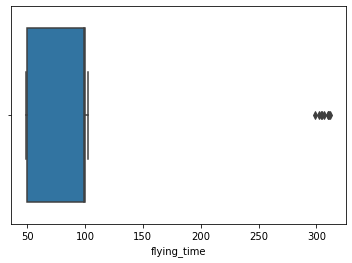

In [12]:
primary_analysis_num('flying_time')

In [13]:
df[df.flying_time>250].nunique()

flight_id         9
flight_no         1
flying_time       8
departure_city    1
arrival_city      1
model             1
spent             8
income            1
profit            8
total_seats       1
boarding_seats    1
seats_percent     1
dtype: int64

In [14]:
df[df.flying_time>250] 

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
118,136560,PG0194,305.0,Anapa,Novokuznetsk,Boeing 737-300,547632.583333,0.0,-547632.583333,130,0.0,0.0
119,136544,PG0194,304.0,Anapa,Novokuznetsk,Boeing 737-300,545837.066667,0.0,-545837.066667,130,0.0,0.0
120,136567,PG0194,311.0,Anapa,Novokuznetsk,Boeing 737-300,533042.596667,0.0,-533042.596667,130,0.0,0.0
121,136546,PG0194,302.0,Anapa,Novokuznetsk,Boeing 737-300,542246.033333,0.0,-542246.033333,130,0.0,0.0
122,136540,PG0194,307.0,Anapa,Novokuznetsk,Boeing 737-300,551223.616667,0.0,-551223.616667,130,0.0,0.0
123,136523,PG0194,312.0,Anapa,Novokuznetsk,Boeing 737-300,560201.200000,0.0,-560201.200000,130,0.0,0.0
124,136514,PG0194,299.0,Anapa,Novokuznetsk,Boeing 737-300,512475.036667,0.0,-512475.036667,130,0.0,0.0
125,136513,PG0194,310.0,Anapa,Novokuznetsk,Boeing 737-300,531328.633333,0.0,-531328.633333,130,0.0,0.0
126,136511,PG0194,310.0,Anapa,Novokuznetsk,Boeing 737-300,531328.633333,0.0,-531328.633333,130,0.0,0.0


Скорее всего, у этих рейсов не было цели получить прибыль, но была иная цель 
(например, сохранить за самолетом авиакомпании время прилета в аэропорту).

Из дальнейшего анализа экономической целесообразности все рейсы в Novokuznetsk будут исключены

In [15]:
df = df[df.flying_time<250]  

<AxesSubplot:>

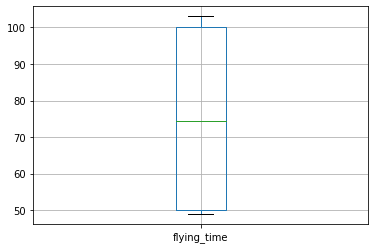

In [16]:
df.boxplot(column='flying_time')

## 3.2. departure_city

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   departure_city  118 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


(Anapa    118
 Name: departure_city, dtype: int64,
 None,
 array(['Anapa'], dtype=object),
 count       118
 unique        1
 top       Anapa
 freq        118
 Name: departure_city, dtype: object)

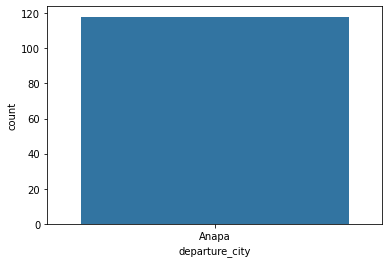

In [17]:
primary_analysis('departure_city')

In [18]:
df['departure_city'].unique()

array(['Anapa'], dtype=object)

## 3.3. arrival_city

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   arrival_city  118 non-null    object
dtypes: object(1)
memory usage: 6.8+ KB


(Belgorod    59
 Moscow      59
 Name: arrival_city, dtype: int64,
 None,
 array(['Belgorod', 'Moscow'], dtype=object),
 count          118
 unique           2
 top       Belgorod
 freq            59
 Name: arrival_city, dtype: object)

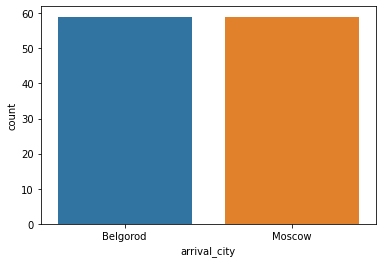

In [19]:
primary_analysis('arrival_city')

In [20]:
df['arrival_city'].unique()

array(['Belgorod', 'Moscow'], dtype=object)

## 3.4. model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   118 non-null    object
dtypes: object(1)
memory usage: 6.8+ KB


(Sukhoi Superjet-100    59
 Boeing 737-300         59
 Name: model, dtype: int64,
 None,
 array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object),
 count                     118
 unique                      2
 top       Sukhoi Superjet-100
 freq                       59
 Name: model, dtype: object)

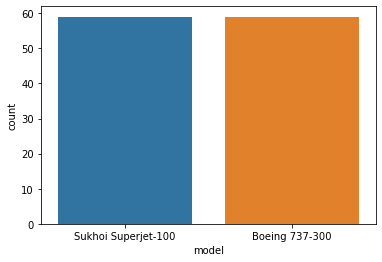

In [21]:
primary_analysis('model')

In [22]:
df['model'].unique()

array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object)

## 3.5. spent

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spent   118 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


(55764.604167     18
 171396.333333    16
 53231.745833     16
 177756.150000    12
 179551.666667    11
 56879.896250      8
 54296.380750      7
 173110.296667     6
 54649.312083      5
 169682.370000     5
 52167.110917      5
 175960.633333     3
 181347.183333     2
 183142.700000     2
 184938.216667     1
 167968.406667     1
 Name: spent, dtype: int64,
 None,
 count       118.000000
 mean     115016.882587
 std       60701.443749
 min       52167.110917
 25%       54649.312083
 50%      112424.151458
 75%      175960.633333
 max      184938.216667
 Name: spent, dtype: float64,
 <AxesSubplot:xlabel='spent'>)

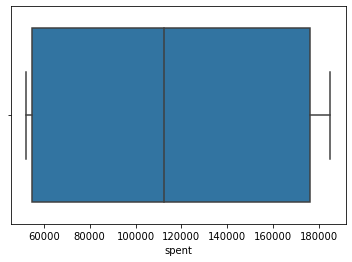

In [23]:
primary_analysis_num('spent')

In [24]:
df['spent'] = df['spent'].apply(lambda x: round(x/1000,2)) # Указаны в тыс.руб., как обычно требуется в бух. отчетности.
df.head(2)

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
0,136900,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54.30,765300.0,711003.61925,97,97.0,1.000000
1,136907,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,56.88,759000.0,702120.10375,97,96.0,0.989691


## 3.6. income

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  118 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


(765300.0     16
 759000.0      8
 746400.0      5
 752700.0      3
 1567600.0     2
              ..
 1825000.0     1
 1676200.0     1
 631200.0      1
 1628600.0     1
 595200.0      1
 Name: income, Length: 79, dtype: int64,
 None,
 count    1.180000e+02
 mean     1.176506e+06
 std      4.794251e+05
 min      5.310000e+05
 25%      7.464000e+05
 50%      1.081650e+06
 75%      1.625850e+06
 max      1.886000e+06
 Name: income, dtype: float64,
 <AxesSubplot:xlabel='income'>)

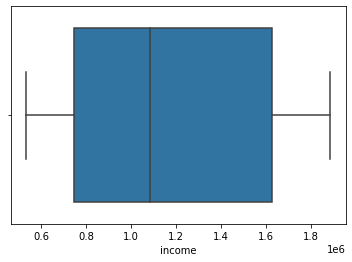

In [25]:
primary_analysis_num('income')

In [26]:
df['income'] = df['income'].apply(lambda x: round(x/1000,2))
df.head(2)

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
0,136900,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54.30,765.3,711003.61925,97,97.0,1.000000
1,136907,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,56.88,759.0,702120.10375,97,96.0,0.989691


## 3.7. profit

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   profit  118 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


(7.110036e+05    5
 7.095354e+05    4
 7.032354e+05    4
 7.120683e+05    4
 6.931683e+05    4
                ..
 5.766354e+05    1
 1.632632e+06    1
 5.218683e+05    1
 1.530404e+06    1
 1.597244e+06    1
 Name: profit, Length: 96, dtype: int64,
 None,
 count    1.180000e+02
 mean     1.061489e+06
 std      4.204820e+05
 min      4.763507e+05
 25%      6.931683e+05
 50%      9.652583e+05
 75%      1.454149e+06
 max      1.706448e+06
 Name: profit, dtype: float64,
 <AxesSubplot:xlabel='profit'>)

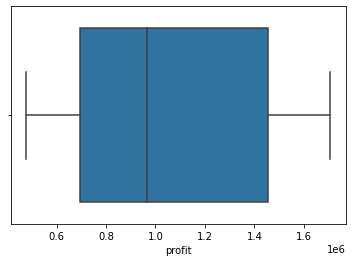

In [27]:
primary_analysis_num('profit')

In [28]:
df['profit'] = df['profit'].apply(lambda x: round(x/1000,2))
df.head(2)

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
0,136900,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54.30,765.3,711.00,97,97.0,1.000000
1,136907,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,56.88,759.0,702.12,97,96.0,0.989691


## 3.8. seats_percent

In [29]:
df['seats_percent'] = df['seats_percent'].apply(lambda x: round(x,2))
df.head(2)

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
0,136900,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54.30,765.3,711.00,97,97.0,1.00
1,136907,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,56.88,759.0,702.12,97,96.0,0.99


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seats_percent  118 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


(1.00    18
 0.99    13
 0.82     8
 0.90     8
 0.85     7
 0.84     6
 0.88     6
 0.98     5
 0.92     4
 0.81     4
 0.80     4
 0.97     3
 0.91     3
 0.93     3
 0.94     3
 0.95     3
 0.83     3
 0.89     3
 0.75     2
 0.86     2
 0.76     2
 0.77     2
 0.96     1
 0.78     1
 0.79     1
 0.87     1
 0.70     1
 0.66     1
 Name: seats_percent, dtype: int64,
 None,
 count    118.000000
 mean       0.900169
 std        0.081587
 min        0.660000
 25%        0.840000
 50%        0.900000
 75%        0.990000
 max        1.000000
 Name: seats_percent, dtype: float64,
 <AxesSubplot:xlabel='seats_percent'>)

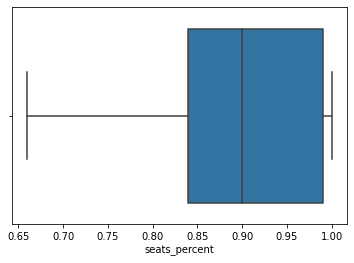

In [30]:
primary_analysis_num('seats_percent')

In [31]:
df[df['seats_percent'] <= 0.84].nunique()

flight_id         35
flight_no          2
flying_time        9
departure_city     1
arrival_city       2
model              2
spent             14
income            31
profit            35
total_seats        2
boarding_seats    17
seats_percent     12
dtype: int64

In [32]:
df[df['seats_percent'] <= 0.84]

,flight_id,flight_no,flying_time,departure_city,arrival_city,model,spent,income,profit,total_seats,boarding_seats,seats_percent
6,136937,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,55.76,626.1,570.34,97,81.0,0.84
8,136922,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,53.23,607.8,554.57,97,76.0,0.78
9,136888,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,53.23,626.1,572.87,97,79.0,0.81
26,136807,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,53.23,531.0,477.77,97,68.0,0.70
28,136823,PG0480,51.0,Anapa,Belgorod,Sukhoi Superjet-100,54.30,620.4,566.10,97,78.0,0.80
30,136844,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,53.23,575.1,521.87,97,79.0,0.81
33,136887,PG0480,49.0,Anapa,Belgorod,Sukhoi Superjet-100,54.65,595.2,540.55,97,78.0,0.80
39,136609,PG0480,50.0,Anapa,Belgorod,Sukhoi Superjet-100,55.76,639.3,583.54,97,81.0,0.84
40,136620,PG0480,49.0,Anapa,Belgorod,Sukhoi Superjet-100,52.17,613.5,561.33,97,79.0,0.81
42,136642,PG0480,49.0,Anapa,Belgorod,Sukhoi Superjet-100,54.65,531.0,476.35,97,64.0,0.66


# 4. Analysis

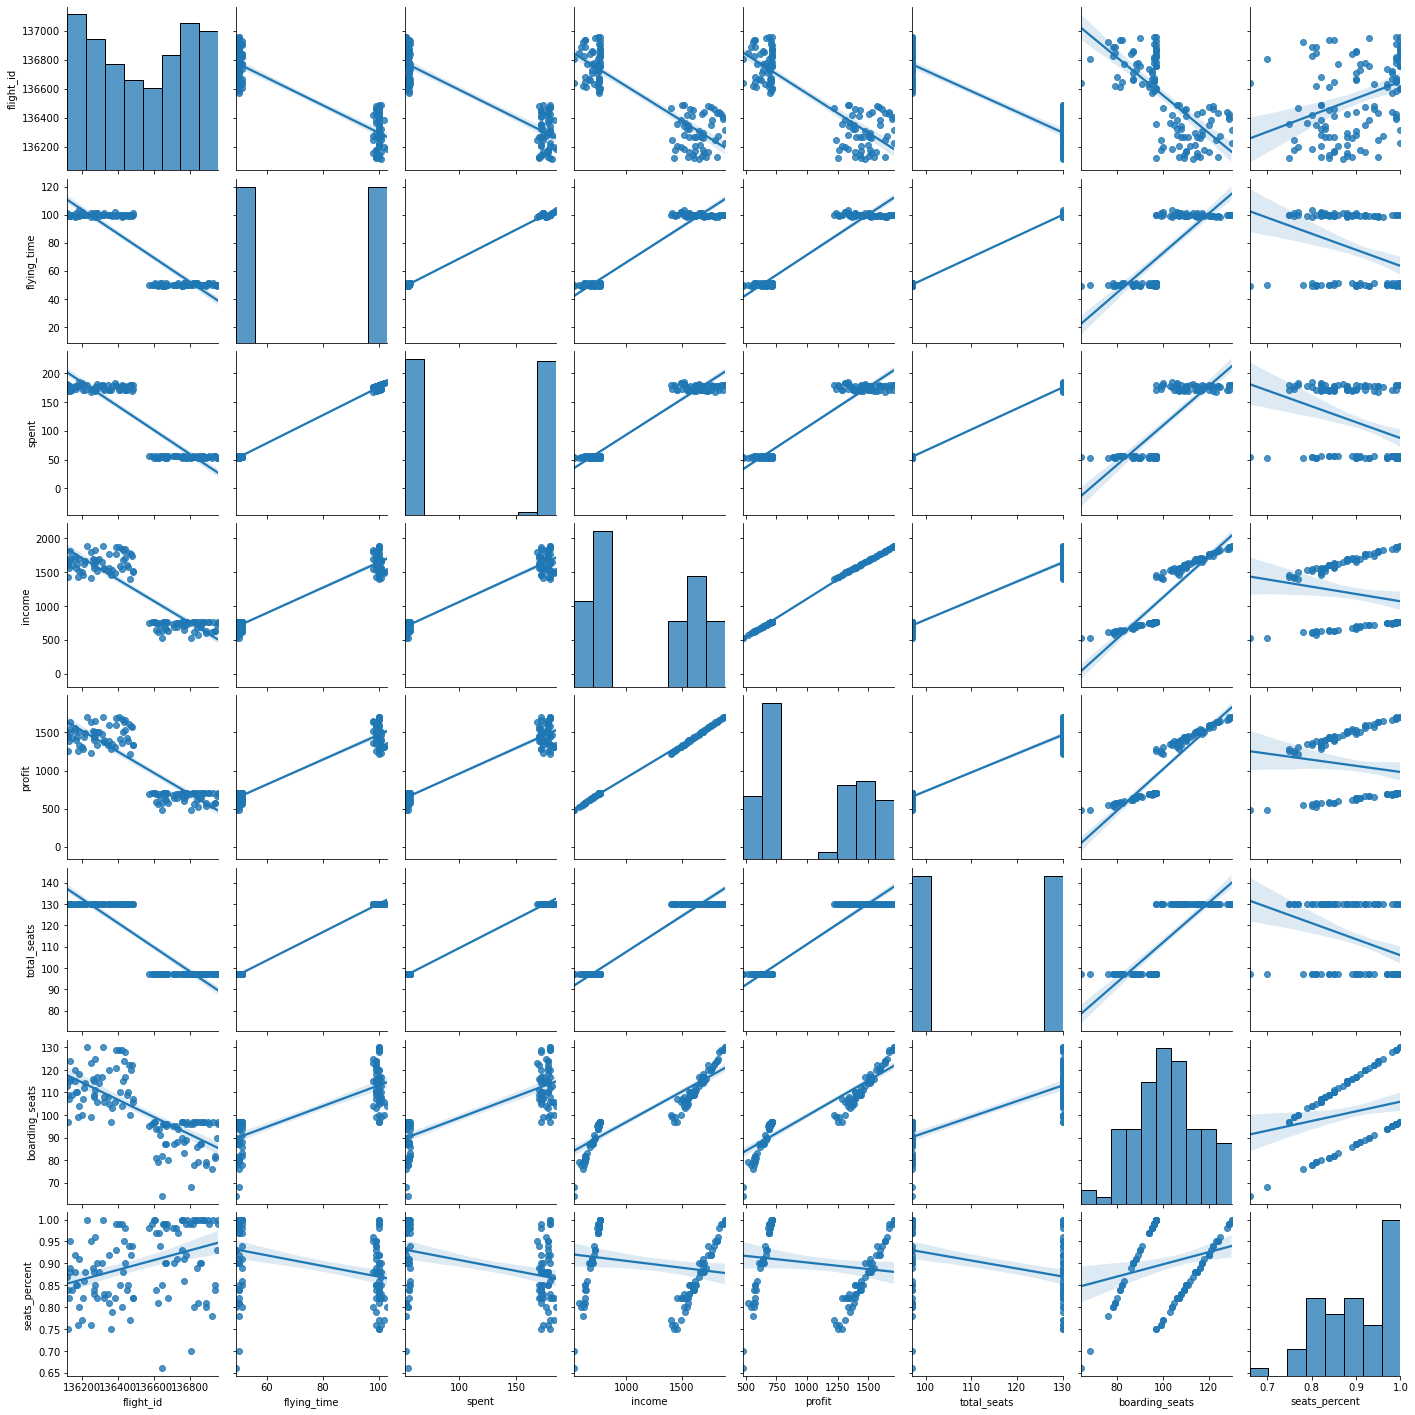

In [33]:
sns.pairplot(df, kind = 'reg')

In [34]:
df.corr()

,flight_id,flying_time,spent,income,profit,total_seats,boarding_seats,seats_percent
flight_id,1.000000,-0.899255,-0.898694,-0.872855,-0.865474,-0.900023,-0.705965,0.357894
flying_time,-0.899255,1.000000,0.998635,0.974231,0.966634,0.999446,0.802897,-0.373259
spent,-0.898694,0.998635,1.000000,0.974648,0.966913,0.998641,0.804461,-0.370235
income,-0.872855,0.974231,0.974648,1.000000,0.999478,0.976290,0.907523,-0.183254
profit,-0.865474,0.966634,0.966913,0.999478,1.000000,0.968981,0.918606,-0.155495
total_seats,-0.900023,0.999446,0.998641,0.976290,0.968981,1.000000,0.805490,-0.371362
boarding_seats,-0.705965,0.802897,0.804461,0.907523,0.918606,0.805490,1.000000,0.244223
seats_percent,0.357894,-0.373259,-0.370235,-0.183254,-0.155495,-0.371362,0.244223,1.000000


In [35]:
abs(df.corr())>0.7 

,flight_id,flying_time,spent,income,profit,total_seats,boarding_seats,seats_percent
flight_id,True,True,True,True,True,True,True,False
flying_time,True,True,True,True,True,True,True,False
spent,True,True,True,True,True,True,True,False
income,True,True,True,True,True,True,True,False
profit,True,True,True,True,True,True,True,False
total_seats,True,True,True,True,True,True,True,False
boarding_seats,True,True,True,True,True,True,True,False
seats_percent,False,False,False,False,False,False,False,True
